In [0]:
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd
#from google.colab import files
#upload = files.upload()

In [2]:
#!pip install tensorflow==2.0.1
import tensorflow as tf
print(tf.__version__)

2.0.1


In [0]:
from sklearn.datasets import load_breast_cancer

In [0]:
data = load_breast_cancer()

In [0]:
type(data)
# this is a bunch obj
# it acts like a dictionary where keys are treated like attributes

sklearn.utils.Bunch

In [0]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [0]:
# shape of our dataset
data.data.shape

(569, 30)

In [0]:
#data.target
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [0]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [0]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target, test_size=0.33)
N,D = X_train.shape

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
# build a model
# tf.keras.layers.Input tells the size of input vector x to keras
# tf.keras.layers.Dense - output size is 1 and act functn is sigmoid
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1,activation='sigmoid')                                    
])

#alternative method
# model = tf.keeras.models.Sequential()
# model.add(tf.keras.layers.Dense(1,input_shape=(D,),activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

# evaluate the model - evaluate() returns loss and accuracy
print('Train score:',model.evaluate(X_train,y_train))
print('Test Score:',model.evaluate(X_test,y_test))

Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 1s 2ms/sample - loss: 1.0414 - accuracy: 0.2257 - val_loss: 0.9654 - val_accuracy: 0.2872
Epoch 2/100
381/381 [==============================] - 0s 101us/sample - loss: 0.9445 - accuracy: 0.2887 - val_loss: 0.8706 - val_accuracy: 0.3511
Epoch 3/100
381/381 [==============================] - 0s 99us/sample - loss: 0.8588 - accuracy: 0.3832 - val_loss: 0.7856 - val_accuracy: 0.4096
Epoch 4/100
381/381 [==============================] - 0s 109us/sample - loss: 0.7840 - accuracy: 0.4751 - val_loss: 0.7120 - val_accuracy: 0.5213
Epoch 5/100
381/381 [==============================] - 0s 102us/sample - loss: 0.7185 - accuracy: 0.5827 - val_loss: 0.6497 - val_accuracy: 0.6011
Epoch 6/100
381/381 [==============================] - 0s 118us/sample - loss: 0.6623 - accuracy: 0.6378 - val_loss: 0.5966 - val_accuracy: 0.6755
Epoch 7/100
381/381 [==============================] - 0s 111us/sample - lo

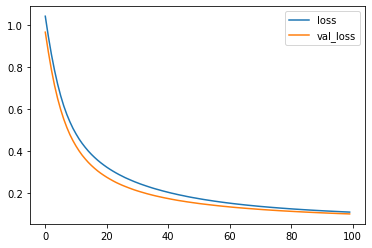

In [38]:
# plot what's returned by model.fit()
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

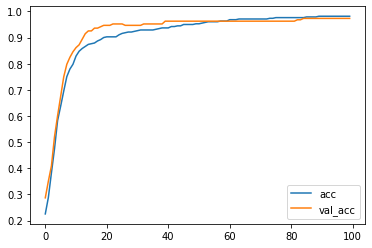

In [39]:
# plot the accuracy too
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

In [40]:
# make predictions
P = model.predict(X_test)
P

array([[5.0016940e-03],
       [9.2035639e-01],
       [1.3593733e-03],
       [8.9522183e-01],
       [9.0555269e-01],
       [9.8645413e-01],
       [3.1515789e-01],
       [6.8226218e-01],
       [9.7309554e-01],
       [9.9397427e-01],
       [8.7677956e-01],
       [9.4587493e-01],
       [9.9231184e-01],
       [3.4465402e-02],
       [9.9675882e-01],
       [2.0623600e-01],
       [9.5485997e-01],
       [7.7393806e-01],
       [9.6025634e-01],
       [0.0000000e+00],
       [6.6479313e-01],
       [9.8767424e-01],
       [9.4629908e-01],
       [9.8465723e-01],
       [9.9533582e-01],
       [2.2739172e-05],
       [9.2826581e-01],
       [9.4531012e-01],
       [7.7424747e-01],
       [4.3637425e-02],
       [8.9065742e-01],
       [9.3552315e-01],
       [1.0080338e-03],
       [9.5055294e-01],
       [9.7931993e-01],
       [3.9036915e-01],
       [9.4854689e-01],
       [5.3290850e-01],
       [9.3694401e-01],
       [9.5878160e-01],
       [9.9928921e-01],
       [1.916289

In [41]:
# round off to get actual predictions
# Note: has to be flattened since the target are size (N,)
# while the predictions are size (N,1)
P = np.round(P).flatten()
P 

array([0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       0.], dtype=float32)

In [42]:
# calc the accuracy
print('Manually calc accuracy:',np.mean(P == y_test))
print('Evaluate as per the model:',model.evaluate(X_test,y_test))

Manually calc accuracy: 0.973404255319149
188/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [3]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-03-25 12:21:31--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-03-25 12:21:31 (67.2 MB/s) - ‘moore.csv’ saved [2302/2302]



In [0]:
#import pandas as pd
data = pd.read_csv('moore.csv',header = None).values
X = data[:,0].reshape(-1,1) #keras requires X to be a 2-D array of NxD dim where D=1
Y = data[:,1]

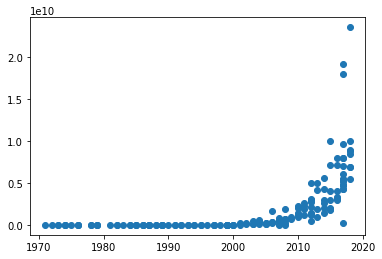

In [13]:
plt.scatter(X,Y)
#the data is exponential in nature

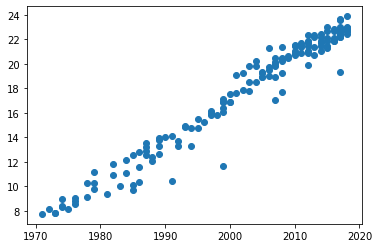

In [46]:
# Since we require a linear model,let's take log
Y = np.log(Y)
plt.scatter(X,Y)

In [0]:
# since the X values are too large ,let's scale them by
X = X-X.mean()

In [0]:
# create our tensorflow model
# we don't need to pass an activation function for linear model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)                                
])

In [0]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9),loss='mse')

In [52]:
# create learning rate scheduler function
def schedule(epoch,lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(X,Y,epochs=200,callbacks=[scheduler])

Train on 162 samples
Epoch 1/200
162/162 [==============================] - 0s 1ms/sample - loss: 392.7200
Epoch 2/200
162/162 [==============================] - 0s 85us/sample - loss: 392.9452
Epoch 3/200
162/162 [==============================] - 0s 73us/sample - loss: 299.3965
Epoch 4/200
162/162 [==============================] - 0s 67us/sample - loss: 239.4096
Epoch 5/200
162/162 [==============================] - 0s 76us/sample - loss: 189.4945
Epoch 6/200
162/162 [==============================] - 0s 85us/sample - loss: 130.2666
Epoch 7/200
162/162 [==============================] - 0s 66us/sample - loss: 95.6647
Epoch 8/200
162/162 [==============================] - 0s 80us/sample - loss: 75.7673
Epoch 9/200
162/162 [==============================] - 0s 85us/sample - loss: 52.2720
Epoch 10/200
162/162 [==============================] - 0s 85us/sample - loss: 40.2047
Epoch 11/200
162/162 [==============================] - 0s 98us/sample - loss: 37.7806
Epoch 12/200
162/162 [====

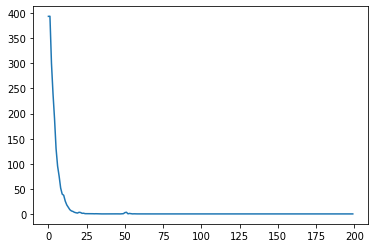

In [53]:
#plot the loss
plt.plot(r.history['loss'],label='loss')

In [21]:
print(model.layers)
print(model.layers[0].get_weights())
# W.shape = (D,M)
# b.shape = (M,)
# D:input size, M:output size
# W = [[0.34057]], b = [17.760347], D = 1, M = 1

[array([[0.34057373]], dtype=float32), array([17.760347], dtype=float32)]


In [23]:
# the slope of the line is 
slope = model.layers[0].get_weights()[0][0,0]
slope

0.34057373

Our orignal model for exponential growth is: C = A0r^t


C:transistor, t:year, r:rate of growth

*   log C = log A0 + tlog r ,similar to y' = ax+b
*   y' = log C


*   a = log r, x = t
*   b = log A0


*   slope i.e a = 0.34057373
*   r = e^a = 1.4706

*   2C = A0r^t^p
*   2C/C gives 2 = r(t^p-t)


*   t^p-t = log2/logr = log 2/a





















In [25]:
print('Tine to double:',np.log(2)/slope)

Tine to double: 2.035233852177339


In [32]:
# analytical solution
X = np.array(X).flatten()
Y = np.array(Y)
denominator = X.dot(X) -X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() )/denominator
b = ( Y.mean() * X.dot(X) - X.mean()*X.dot(Y) )/denominator
print(a,b)
print('Tine to double:',np.log(2)/slope)

0.341682487387313 17.764939393631764
Tine to double: 2.035233852177339


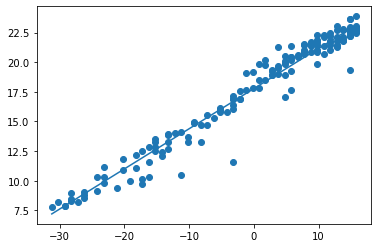

In [54]:
# make predictions
yhat = model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X,yhat)

In [57]:
# get the weights
w,b = model.layers[0].get_weights()
# reshape X as we flattened it above
X = X.reshape(-1,1)
# (Nx1) * (1x1) + 1 --> (Nx1) that's why we need to flatten the matrix to get (1x1) matrix
yhat1 = (X.dot(w) + b).flatten()

np.allclose(yhat,yhat1)

True